In [16]:
# notebooks/03_Resultados.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import shap

In [17]:
# Cargar modelo y datos
print("📥 Cargando modelo y datos...")
model = joblib.load('../models/best_model.pkl')
X = pd.read_csv('../data/processed/X_processed.csv')
y = pd.read_csv('../data/processed/y.csv').squeeze()

📥 Cargando modelo y datos...


In [18]:
# Dividir datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [19]:
# Evaluar modelo
print("📊 Evaluando modelo...")
y_pred = model.predict(X_test)
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

📊 Evaluando modelo...
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       442
           1       0.89      0.95      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



In [20]:
# Validación cruzada
print("🔁 Validación cruzada (F1-Score)...")
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(f"F1-Score: {scores.mean():.2f} ± {scores.std():.2f}")


🔁 Validación cruzada (F1-Score)...


c:\Users\HP_VICTUS\anaconda3\envs\ml_modelo_predictivo_estudiantil\lib\site-packages\xgboost\core.py:158: UserWarning: [00:17:51] WARNING: D:\bld\xgboost-split_1744329000128\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP_VICTUS\anaconda3\envs\ml_modelo_predictivo_estudiantil\lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:41] WARNING: D:\bld\xgboost-split_1744329000128\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP_VICTUS\anaconda3\envs\ml_modelo_predictivo_estudiantil\lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:28] WARNING: D:\bld\xgboost-split_1744329000128\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP_VICTUS\anaconda3\envs\ml_modelo_predictivo_estudiantil\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:15] WARNING: D:\

F1-Score: 0.92 ± 0.01


In [21]:
# Importancia de características
print("🧠 Generando importancia de características...")
importances = model.best_estimator_.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
features_df = features_df.sort_values(by='Importancia', ascending=False).head(10)

🧠 Generando importancia de características...


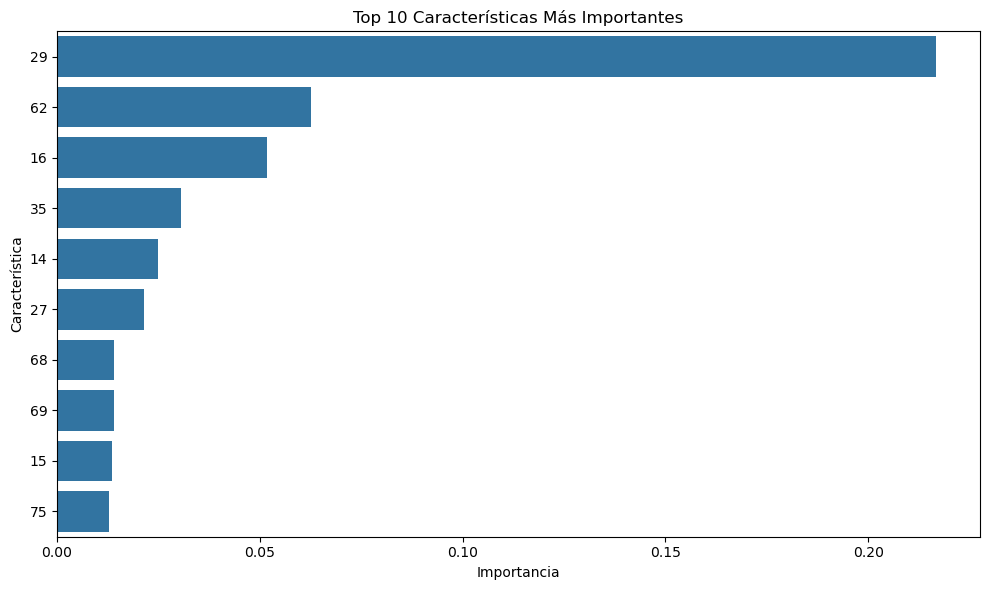

In [22]:
# Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=features_df)
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('../reports/feature_importance.png')
plt.show()

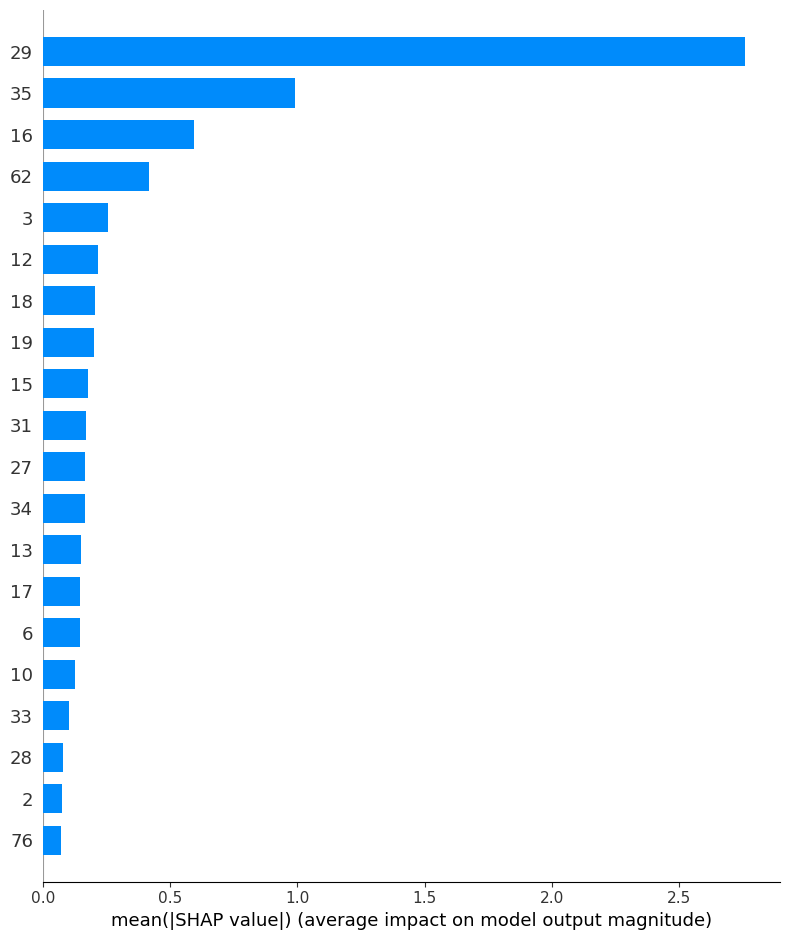

<Figure size 640x480 with 0 Axes>

In [23]:
# Interpretación con SHAP
explainer = shap.Explainer(model.best_estimator_)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.savefig('../reports/shap_importance.png')

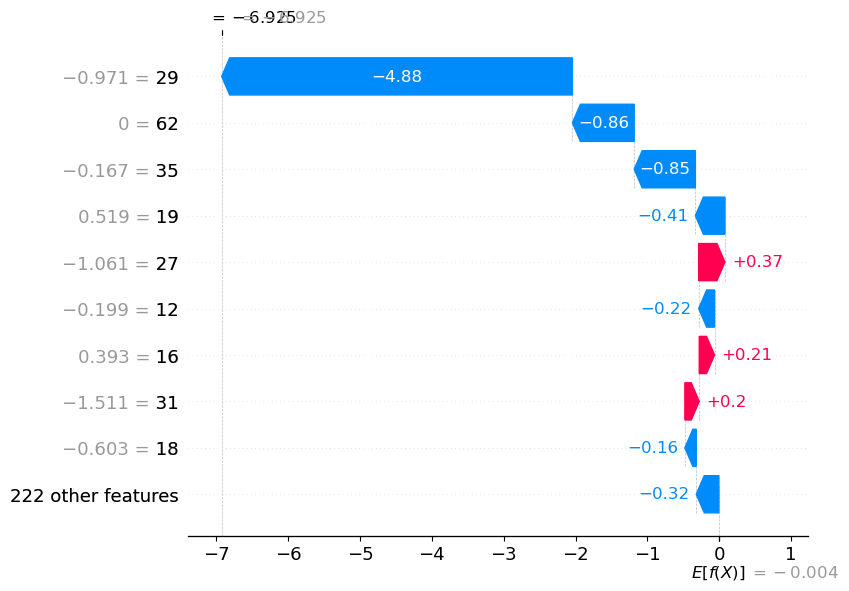

In [24]:
# Gráfico de waterfall
shap.plots.waterfall(shap_values[0])
plt.savefig('../reports/waterfall_plot.png')
plt.close()

In [25]:
print("✅ Análisis de resultados completado y guardado en reports/")

✅ Análisis de resultados completado y guardado en reports/


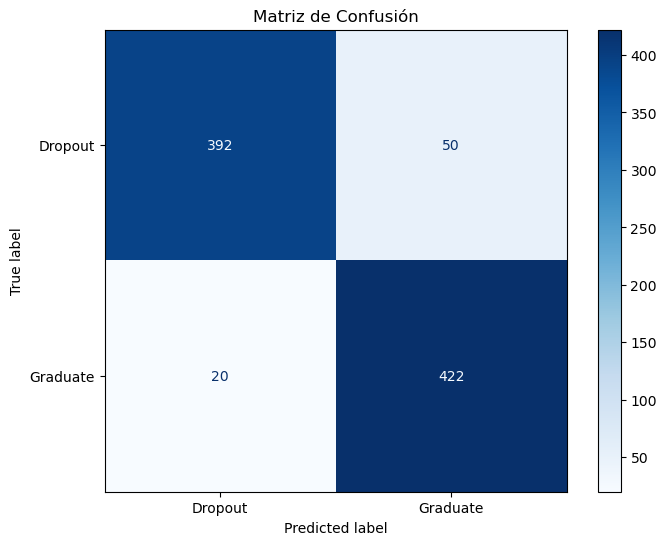

In [26]:
# Confusión Matirx

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title('Matriz de Confusión')
plt.savefig('../reports/confusion_matrix.png')

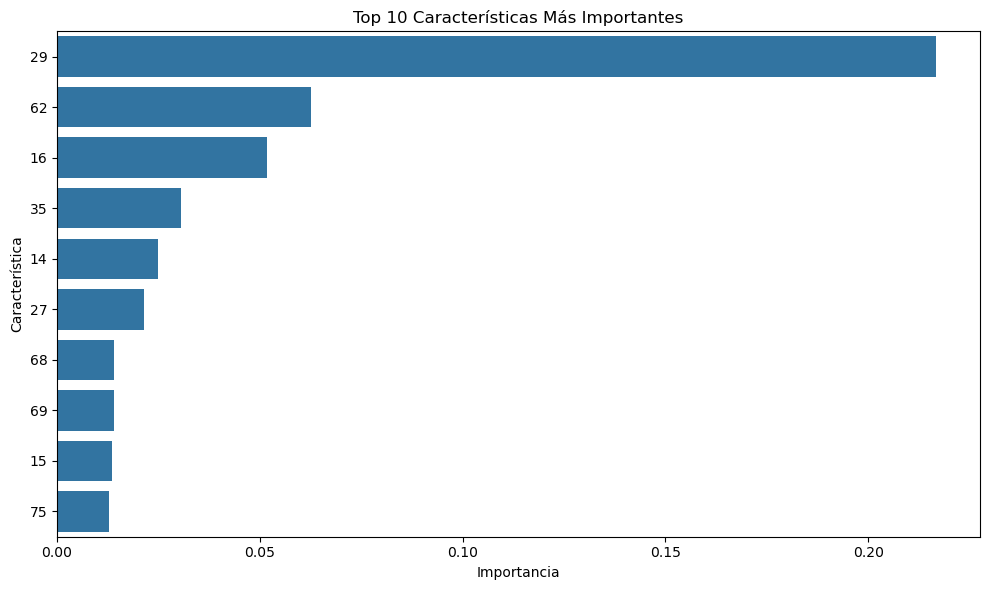

In [27]:
# Importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=features_df)
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('../reports/feature_importance.png')